# Phenotypic Sensitivity to Parametric Changes

© 2018 Griffin Chure. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

--- 

In [26]:
import sys
sys.path.insert(0, '../../')
import numpy as np
import pandas as pd
import sympy
import bokeh.io
import bokeh.plotting
import mut.thermo
import bokeh.layouts
constants = mut.thermo.load_constants()
bokeh.io.output_notebook()

sympy.init_printing()

Loading BokehJS ...

In this notebook, we examine the general relationship between phenotypic properties and their parametric changes,

$$
{\partial \text{phenotype} \over \partial \text{parameter}} \tag{1}.
$$

We've looked at the sensitivity of the fold-change (phenotype) depends on the inducer dissociation constants. Now, let's look at how $F$ as a phenotype depends on these parameters.


# Define the symbols

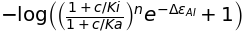

In [28]:
# Define symbols
c = sympy.Symbol('c')
Ka  = sympy.Symbol('Ka')
Ki  = sympy.Symbol('Ki')
epAI = sympy.Symbol(r'\Delta\varepsilon_{AI}')
n = sympy.Symbol('n')

# Define the ∆F function. 
deltaF = -sympy.log(1 + sympy.exp(-epAI) * ((1 + c/Ki)/ (1 + c/Ka))**n)
deltaF

### $\partial \Delta F / \partial \Delta\varepsilon_{AI}$

### $\partial \Delta F / \partial K_A$

In [25]:
dF_dKa = sympy.diff(sympy.diff(deltaF, Ka), Ka)

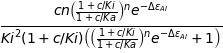

In [17]:
sympy.diff(deltaF, Ki)

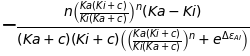

In [19]:
sympy.simplify(sympy.diff(deltaF, c))

##  Case III Varying $\Delta\varepsilon_{AI}$

In [29]:
epAI0 = constants['ep_AI']
Ka0 = constants['Ka']
Ki0 = constants['Ki']
c0 = 50 # in µM
R0 = 260
n0 = 2
epRA0=-13.9 # in kBT

In [31]:
def deriv_delF_epAI(ep_ai, ka, ki, c, n):
    return (1 + np.exp(ep_ai) * ((1 + c/ka)**n / (1 + c/ki)**n))**-1
def deriv_delF_c(ep_ai, ka, ki, c, n):
    numer = 2 * ka**2 * (ki - ka) * (ki + c)
    denom = np.exp(-ep_ai) * ki**2 * (ka + c)**3 + ka**2 * (ki + c)**2 * (ka + c)
    return numer / denom
def deriv_delF_Ka(ep_ai, ka, ki, c, n):
    numer = - 2 * Ka * c* (ki + c)
    denom = np.exp(ep_AI) * ki**2 * (ka + c)**3 + ka**2 * (ki + c)**2 * (ka + c)
    return numer / denom
def deriv_delF_ki(ep_ai, ka, ki, c, n):
    numer = 2  * ka**2 * c * (ki + c)
    denom = np.exp(-ep_ai) * ki*83 * (ka + c) + ki * ka**2(ki + c)**2
    return numer / denom

In [38]:
epAI_range = np.linspace(-5, 20, 500)
c_range = np.logspace(-4, 4, 500)
ka_range = np.linspace(0, 1000, 1000)
ki_range = np.linspace(0, 10, 100)

# Compute the derivatives
ddf_epai = deriv_delF_epAI(epAI_range, Ka0, Ki0, c0, n0)
ddf_c = deriv_delF_c(epAI0, Ka0, Ki0, c_range, n0)
ddf_

# Set up figures
p_epAI = bokeh.plotting.figure(width=300, height=200, x_axis_label = '∆ε_AI [kT]', y_axis_label='∆F')
p_c = bokeh.plotting.figure(width=300, height=200, x_axis_label = 'c / c0', y_axis_label='∆F',
                           x_axis_type='log')
p_Ka = bokeh.plotting.figure(width=300, height=200, x_axis_label = 'Ka / Ka_0', y_axis_label='∆F')
p_Ki = bokeh.plotting.figure(width=300, height=200, x_axis_label = 'Ki / Ki_0', y_axis_label='∆F')

p_epAI.line(epAI_range, ddf_epai)
p_c.line(c_range / c0, ddf_c)

layout = bokeh.layouts.layout([[p_epAI, p_c],[p_Ka, p_Ki]])
bokeh.io.show(layout)


## Case I: Change *only* in $c$, all other parameters identical

In this case, we wish to compute the derivative of ∆F wrt changing concentration $c$ relative to some reference state $c_0$. In this case, all other allosteric parameters $K_A$, $K_I$, $\Delta\varepsilon_{AI}$, and $n$ are unpertrubed. The derivative of ∆F wrt c is nontrivial so SymPy to the rescue

In [5]:
# Define the sympy symbols.
c = sympy.Symbol('c')
c_0 = sympy.Symbol('c_0')
Ka  = sympy.Symbol('Ka')
Ki  = sympy.Symbol('Ki')
Ka_0  = sympy.Symbol('Ka_0')
Ki_0  = sympy.Symbol('Ki_0')
epAI_0 = sympy.Symbol(r'\Delta\varepsilon_{AI_0}')
epAI = sympy.Symbol(r'\Delta\varepsilon_{AI}')
n = sympy.Symbol('n')
pact_ref = (1 + sympy.exp(-epAI_0)*((1 + c / Ki_0)**n / (1 + c / Ka_0)**n))**-1
pact_per = (1 + sympy.exp(-epAI)*((1 + c / Ki)**n / (1 + c / Ka)**n))**-1
log_pact_ratio = sympy.log(pact_ref / pact_per)          

In [9]:
diff = sympy.diff(log_pact_ratio, c, simplify=True)
sympy.solve(diff, c)


NotImplementedError: multiple generators [c, (1 + c/Ka)**n, (1 + c/Ka_0)**n, (1 + c/Ki)**n, (1 + c/Ki_0)**n]
No algorithms are implemented to solve equation (1 + (1 + c/Ka)**(-n)*(1 + c/Ki)**n*exp(-\Delta\varepsilon_{AI}))*(-n*(1 + c/Ka_0)**(-n)*(1 + c/Ki_0)**n*exp(-\Delta\varepsilon_{AI_0})/(Ki_0*(1 + c/Ki_0)) + n*(1 + c/Ka_0)**(-n)*(1 + c/Ki_0)**n*exp(-\Delta\varepsilon_{AI_0})/(Ka_0*(1 + c/Ka_0)))/(1 + (1 + c/Ka_0)**(-n)*(1 + c/Ki_0)**n*exp(-\Delta\varepsilon_{AI_0}))**2 + (n*(1 + c/Ka)**(-n)*(1 + c/Ki)**n*exp(-\Delta\varepsilon_{AI})/(Ki*(1 + c/Ki)) - n*(1 + c/Ka)**(-n)*(1 + c/Ki)**n*exp(-\Delta\varepsilon_{AI})/(Ka*(1 + c/Ka)))/(1 + (1 + c/Ka_0)**(-n)*(1 + c/Ki_0)**n*exp(-\Delta\varepsilon_{AI_0}))

In [11]:
sympy.solve?

Signature: sympy.solve(f, *symbols, **flags)
Docstring:
Algebraically solves equations and systems of equations.

Currently supported are:
    - polynomial,
    - transcendental
    - piecewise combinations of the above
    - systems of linear and polynomial equations
    - systems containing relational expressions.

Input is formed as:

* f
    - a single Expr or Poly that must be zero,
    - an Equality
    - a Relational expression or boolean
    - iterable of one or more of the above

* symbols (object(s) to solve for) specified as
    - none given (other non-numeric objects will be used)
    - single symbol
    - denested list of symbols
      e.g. solve(f, x, y)
    - ordered iterable of symbols
      e.g. solve(f, [x, y])

* flags
    'dict'=True (default is False)
        return list (perhaps empty) of solution mappings
    'set'=True (default is False)
        return list of symbols and set of tuple(s) of solution(s)
    'exclude=[] (default)'
        don't try to solve for an

In [15]:
sympy.Derivative?

Init signature: sympy.Derivative(expr, *variables, **kwargs)
Docstring:     
Carries out differentiation of the given expression with respect to symbols.

expr must define ._eval_derivative(symbol) method that returns
the differentiation result. This function only needs to consider the
non-trivial case where expr contains symbol and it should call the diff()
method internally (not _eval_derivative); Derivative should be the only
one to call _eval_derivative.

Simplification of high-order derivatives:

Because there can be a significant amount of simplification that can be
done when multiple differentiations are performed, results will be
automatically simplified in a fairly conservative fashion unless the
keyword ``simplify`` is set to False.

    >>> from sympy import sqrt, diff
    >>> from sympy.abc import x
    >>> e = sqrt((x + 1)**2 + x)
    >>> diff(e, (x, 5), simplify=False).count_ops()
    136
    >>> diff(e, (x, 5)).count_ops()
    30

Ordering of variables:

If evaluate is s

In [4]:
F_range = np.linspace(-8, 8, 500)

fig = bokeh.plotting.figure(x_axis_label='Bohr parameter [kT]',
                           y_axis_label='d fc / dF')

fig.line(F_range, np.exp(-F_range) / (1 + np.exp(-F_range))**2)
bokeh.io.show(fig)


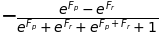

In [5]:
fc_ref = (1 + sympy.exp(-F_ref))**-1
fc_per = (1 + sympy.exp(-F_per))**-1
sympy.simplify(fc_ref - fc_per)